In [1]:
import numpy as np
import cv2

In [2]:
my_faces = np.load('my_faces.npy')
unknown_faces = np.load('unknown_faces.npy')

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = np.r_[my_faces.reshape(400,-1), unknown_faces.reshape(400,-1)]

In [5]:
data = data / 255.0


In [6]:
data.shape

(800, 7500)

In [7]:
labels = np.zeros((data.shape[0],1))

In [8]:
labels[400:,:] = 1.0

In [9]:
np.unique(labels, return_counts=True)

(array([0., 1.]), array([400, 400], dtype=int64))

In [10]:
names = {
    0 : 'Kashish',
    1 : 'Unknown_Face'
}

In [11]:
labels[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

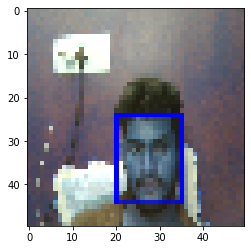

In [12]:
plt.imshow(data[8].reshape(50,50,3))

In [13]:
data = np.c_[data,labels]

In [14]:
data

array([[0.58823529, 0.55686275, 0.54509804, ..., 0.28235294, 0.33333333,
        0.        ],
       [0.58431373, 0.55686275, 0.54901961, ..., 0.26666667, 0.30588235,
        0.        ],
       [0.58431373, 0.55686275, 0.54901961, ..., 0.26666667, 0.30588235,
        0.        ],
       ...,
       [0.98039216, 0.25490196, 0.91372549, ..., 0.25490196, 0.91372549,
        1.        ],
       [0.98039216, 0.25490196, 0.91372549, ..., 0.25490196, 0.91372549,
        1.        ],
       [0.98039216, 0.25490196, 0.91372549, ..., 0.25490196, 0.91372549,
        1.        ]])

In [15]:
np.random.shuffle(data)

In [16]:
labels = data[:,-1]

In [17]:
np.unique(labels,return_counts=True)

(array([0., 1.]), array([400, 400], dtype=int64))

In [18]:
data

array([[0.98039216, 0.25490196, 0.91372549, ..., 0.25490196, 0.91372549,
        1.        ],
       [0.98039216, 0.25490196, 0.91372549, ..., 0.25490196, 0.91372549,
        1.        ],
       [0.98039216, 0.25490196, 0.91372549, ..., 0.25490196, 0.91372549,
        1.        ],
       ...,
       [0.48235294, 0.51764706, 0.54509804, ..., 0.65882353, 0.82745098,
        0.        ],
       [0.5254902 , 0.52156863, 0.52941176, ..., 0.7372549 , 0.76470588,
        0.        ],
       [0.47058824, 0.43137255, 0.46666667, ..., 0.24705882, 0.16078431,
        0.        ]])

In [19]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2) ** 2))

In [22]:
def knn(data, target, k=11):
    dist = []
    for i in range(len(data)):
        dist.append(distance(data[i], target))
    #print(dist)
    sorted_index = np.argsort(dist)
    sorted_labels = labels[sorted_index][:k]
    #print(sorted_labels)
    unique_labels = np.unique(sorted_labels, return_counts=True)
    #print(unique_labels)
    majority_element = np.argmax(unique_labels[1])
    return majority_element

In [25]:
haardata = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('video_1.mp4')
faceData = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = cap.read()
    if flag:
        img = cv2.resize(img, None, fx=0.5, fy=0.5)
        faces = haardata.detectMultiScale(img,1.2)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 5)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            #face = face / 255.0
            pred = knn(data, face.reshape(1,-1))
            name = names[int(pred)]
            #print(pred)
            cv2.putText(img, name, (x,y), font, 1, (0,255,0),1)
        cv2.imshow('img', img)
        if cv2.waitKey(1) == 27 or len(faceData) >= 400:
            break
    else:
        print("Camera is not detected...")
        break
cv2.destroyAllWindows()
cap.release()

ValueError: operands could not be broadcast together with shapes (7501,) (1,7500) 